# Setup

In [61]:
%reload_ext autoreload 
%autoreload 2
%matplotlib inline

In [62]:
from fastai import *
from fastai.vision import *

In [63]:
bs = 64
np.random.seed(2)

# Load data

In [64]:
data_path = "../input/poisonous_plants_dataset/"
data = ImageDataBunch.from_folder(data_path, bs=bs//2, size=299, ds_tfms=get_transforms(),num_workers=0).normalize(imagenet_stats)

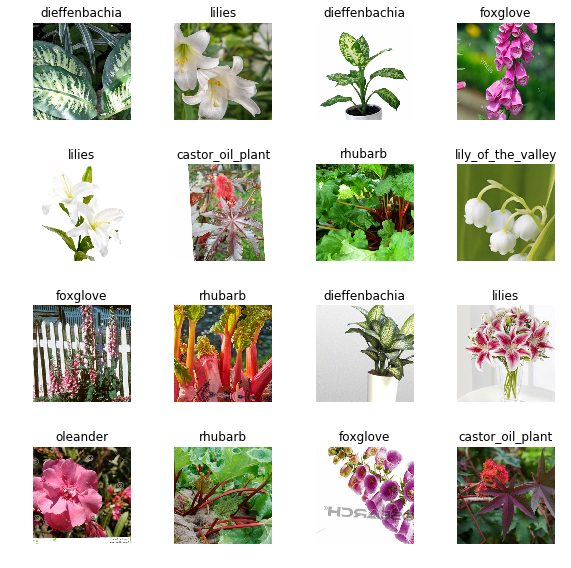

In [65]:
data.show_batch(rows=4,figsize=(8,8))

# Create and train model

In [66]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, path=".")

In [67]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.584656,0.443781,0.869048,00:23
1,0.837645,0.120662,0.976190,00:22
2,0.540718,0.099341,0.964286,00:22
3,0.386217,0.096619,0.976190,00:23


# Interpret results

In [68]:
interp = ClassificationInterpretation.from_learner(learn)

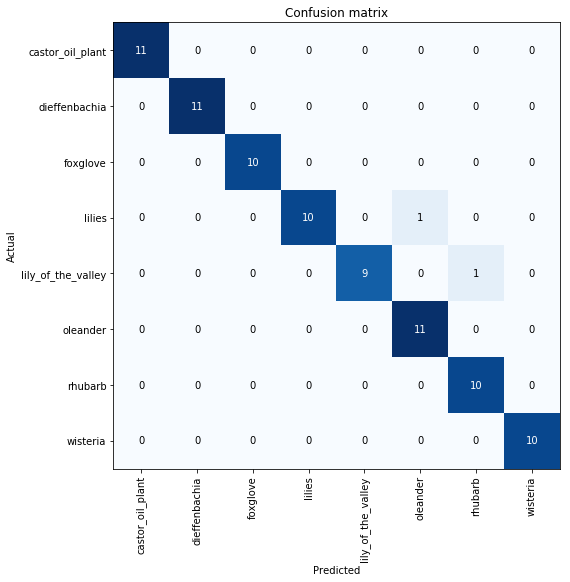

In [69]:
interp.plot_confusion_matrix(figsize=(8,8))

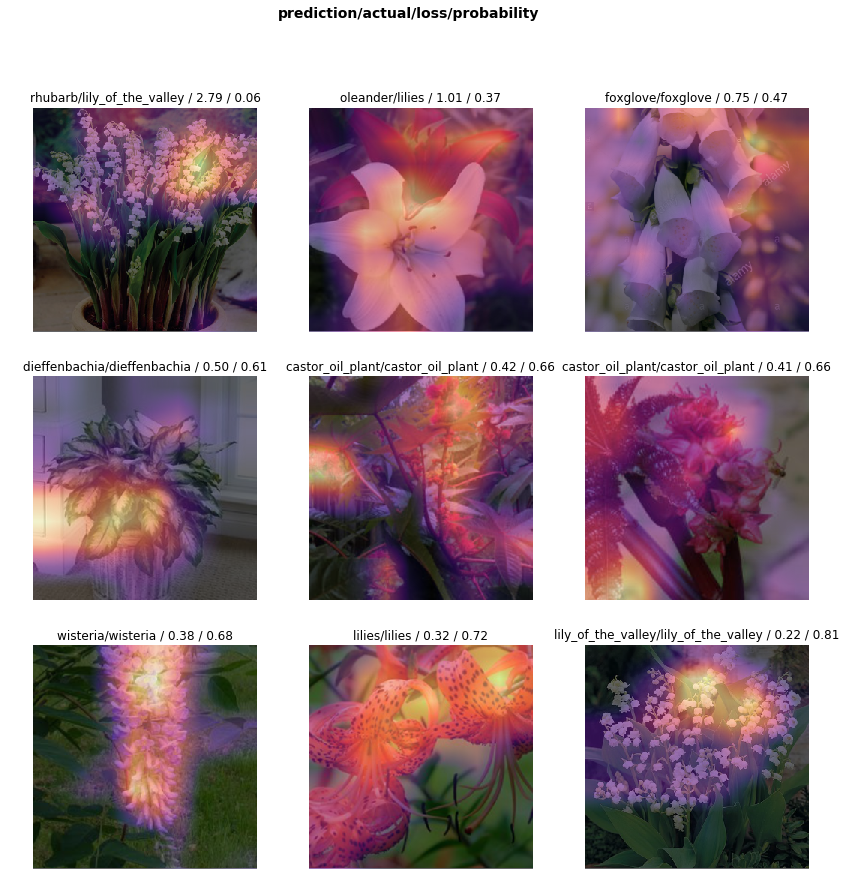

In [70]:
interp.plot_top_losses(9,figsize=(14,14))

In [71]:
interp.most_confused(min_val=0)

[('lilies', 'oleander', 1),
 ('lily_of_the_valley', 'rhubarb', 1),
 ('castor_oil_plant', 'castor_oil_plant', 0),
 ('castor_oil_plant', 'dieffenbachia', 0),
 ('castor_oil_plant', 'foxglove', 0),
 ('castor_oil_plant', 'lilies', 0),
 ('castor_oil_plant', 'lily_of_the_valley', 0),
 ('castor_oil_plant', 'oleander', 0),
 ('castor_oil_plant', 'rhubarb', 0),
 ('castor_oil_plant', 'wisteria', 0),
 ('dieffenbachia', 'castor_oil_plant', 0),
 ('dieffenbachia', 'dieffenbachia', 0),
 ('dieffenbachia', 'foxglove', 0),
 ('dieffenbachia', 'lilies', 0),
 ('dieffenbachia', 'lily_of_the_valley', 0),
 ('dieffenbachia', 'oleander', 0),
 ('dieffenbachia', 'rhubarb', 0),
 ('dieffenbachia', 'wisteria', 0),
 ('foxglove', 'castor_oil_plant', 0),
 ('foxglove', 'dieffenbachia', 0),
 ('foxglove', 'foxglove', 0),
 ('foxglove', 'lilies', 0),
 ('foxglove', 'lily_of_the_valley', 0),
 ('foxglove', 'oleander', 0),
 ('foxglove', 'rhubarb', 0),
 ('foxglove', 'wisteria', 0),
 ('lilies', 'castor_oil_plant', 0),
 ('lilies', '

In [72]:
learn.save('stage-1')

# Fine tuning

In [73]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


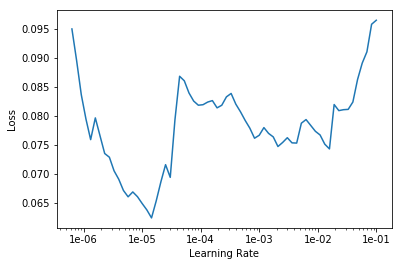

In [74]:
learn.recorder.plot()

In [75]:
learn.unfreeze()
learn.fit_one_cycle(4,max_lr=slice(4e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.089648,0.097992,0.964286,00:24
1,0.094519,0.090515,0.976190,00:22
2,0.081331,0.088479,0.976190,00:23
3,0.078985,0.084846,0.976190,00:23


# Interpret Fine tuning results

In [76]:
interp = ClassificationInterpretation.from_learner(learn)

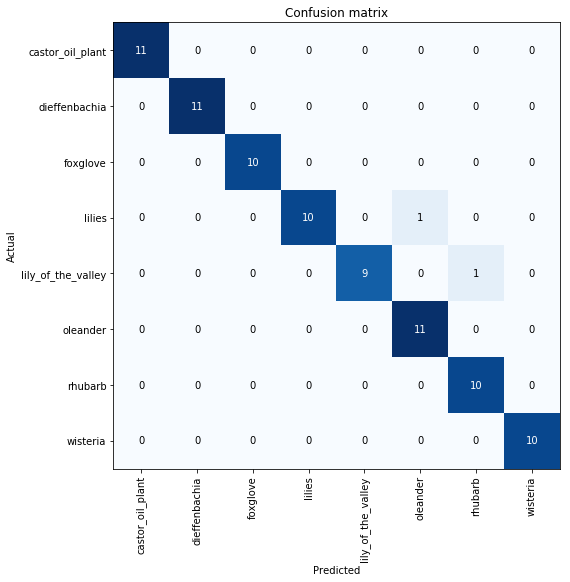

In [77]:
interp.plot_confusion_matrix(figsize=(8,8))

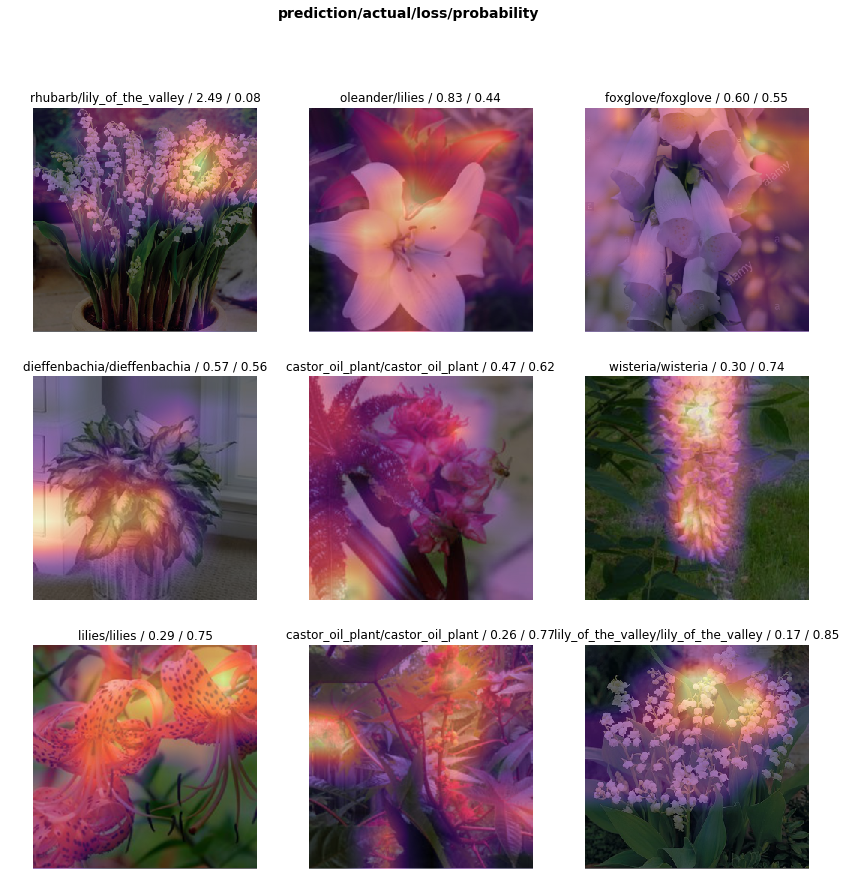

In [78]:
interp.plot_top_losses(9,figsize=(14,14))

# Predict on test data

In [79]:
test_data = ImageDataBunch.from_folder(data_path, bs=bs//2, size=299, ds_tfms=get_transforms(),num_workers=0,valid='test').normalize(imagenet_stats)
loss, acc = learn.validate(test_data.valid_dl)

In [80]:
print(f'Loss: {loss}, Accuracy: {acc*100} %')

Loss: 0.13860592246055603, Accuracy: 95.28302001953125 %
